<a href="https://colab.research.google.com/github/u6587017/license-plate-detection-yolov8s/blob/main/license_plate_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics
!pip install albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import yaml
import torch
from PIL import Image
from IPython.display import display, Video
from ultralytics import YOLO
from collections import deque
import subprocess  # For executing ffmpeg

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
import yaml

# Correct paths for Colab
train_dir = "/content/drive/MyDrive/data/data_images/train"
val_dir = "/content/drive/MyDrive/data/data_images/test"
classes = ["license_plate"]

# Write YAML
data = {
    'train': train_dir,
    'val': val_dir,
    'nc': len(classes),
    'names': classes
}

yaml_path = "./working/data.yaml"
with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

# Check
!cat {yaml_path}


names:
- license_plate
nc: 1
train: /content/drive/MyDrive/data/data_images/train
val: /content/drive/MyDrive/data/data_images/test


In [27]:
model = YOLO("yolov8n.pt")

In [28]:
results = model.train(
    data="./working/data.yaml",
    epochs=20,
    imgsz=640,
    lr0= 0.001,
    batch=32,
    lrf=0.1,
    save_crop= True,
    augment=True
)


Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./working/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profil

train: Scanning /content/drive/MyDrive/data/data_images/train.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.4±1.4 ms, read: 31.0±32.6 MB/s, size: 116.4 KB)


val: Scanning /content/drive/MyDrive/data/data_images/test.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]

Plotting labels to runs/detect/train3/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.439      3.837      1.381          9        640: 100%|██████████| 7/7 [03:31<00:00, 30.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.31s/it]

                   all         25         25     0.0032       0.96      0.431      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.174      2.456      1.076         16        640: 100%|██████████| 7/7 [03:14<00:00, 27.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.33s/it]

                   all         25         25    0.00333          1      0.855       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G       1.18      1.843      1.038         19        640: 100%|██████████| 7/7 [03:09<00:00, 27.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.36s/it]

                   all         25         25    0.00333          1      0.805       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.189      1.693      1.076         15        640: 100%|██████████| 7/7 [03:20<00:00, 28.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.09s/it]

                   all         25         25    0.00333          1       0.72       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.189      1.493      1.083         18        640: 100%|██████████| 7/7 [03:12<00:00, 27.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.50s/it]

                   all         25         25      0.881       0.32      0.681      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.167      1.503      1.102         11        640: 100%|██████████| 7/7 [03:06<00:00, 26.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.45s/it]

                   all         25         25          1      0.151      0.671      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.192      1.462      1.115         14        640: 100%|██████████| 7/7 [03:04<00:00, 26.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.48s/it]

                   all         25         25        0.9      0.362      0.835      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.121      1.406      1.084         10        640: 100%|██████████| 7/7 [03:16<00:00, 28.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.40s/it]

                   all         25         25      0.823       0.52      0.784      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.093      1.309      1.082         12        640: 100%|██████████| 7/7 [03:09<00:00, 27.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.56s/it]

                   all         25         25      0.726      0.744      0.694       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.065      1.252      1.086         13        640: 100%|██████████| 7/7 [03:10<00:00, 27.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.05s/it]

                   all         25         25      0.634      0.624      0.595      0.335


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.078      1.712      1.055          8        640: 100%|██████████| 7/7 [03:12<00:00, 27.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.03s/it]

                   all         25         25      0.638       0.32      0.426      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.086      1.509      1.044          8        640: 100%|██████████| 7/7 [03:05<00:00, 26.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.18s/it]

                   all         25         25          1      0.826      0.868      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.054      1.489       1.02          8        640: 100%|██████████| 7/7 [03:06<00:00, 26.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.34s/it]

                   all         25         25      0.904        0.8      0.869      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.026      1.393      1.074          8        640: 100%|██████████| 7/7 [03:05<00:00, 26.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.45s/it]

                   all         25         25      0.985       0.84      0.936       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.041      1.334      1.046          8        640: 100%|██████████| 7/7 [03:08<00:00, 26.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.23s/it]

                   all         25         25      0.916       0.92      0.944      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.9975      1.219          1          8        640: 100%|██████████| 7/7 [03:10<00:00, 27.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.32s/it]

                   all         25         25      0.924       0.88      0.936      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.006      1.149      1.035          8        640: 100%|██████████| 7/7 [03:10<00:00, 27.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.39s/it]

                   all         25         25      0.875       0.96      0.951      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.9389       1.13      1.016          8        640: 100%|██████████| 7/7 [03:07<00:00, 26.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.45s/it]

                   all         25         25       0.96      0.959      0.981      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.9212      1.074       1.01          8        640: 100%|██████████| 7/7 [03:16<00:00, 28.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.91s/it]

                   all         25         25      0.922      0.945      0.978      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.9105      1.069     0.9734          8        640: 100%|██████████| 7/7 [03:13<00:00, 27.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.48s/it]

                   all         25         25      0.949       0.92      0.952       0.61



20 epochs completed in 1.110 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:16<00:00, 16.40s/it]


                   all         25         25      0.996       0.92      0.985      0.629
Speed: 2.5ms preprocess, 615.2ms inference, 0.0ms loss, 15.3ms postprocess per image
Results saved to runs/detect/train3


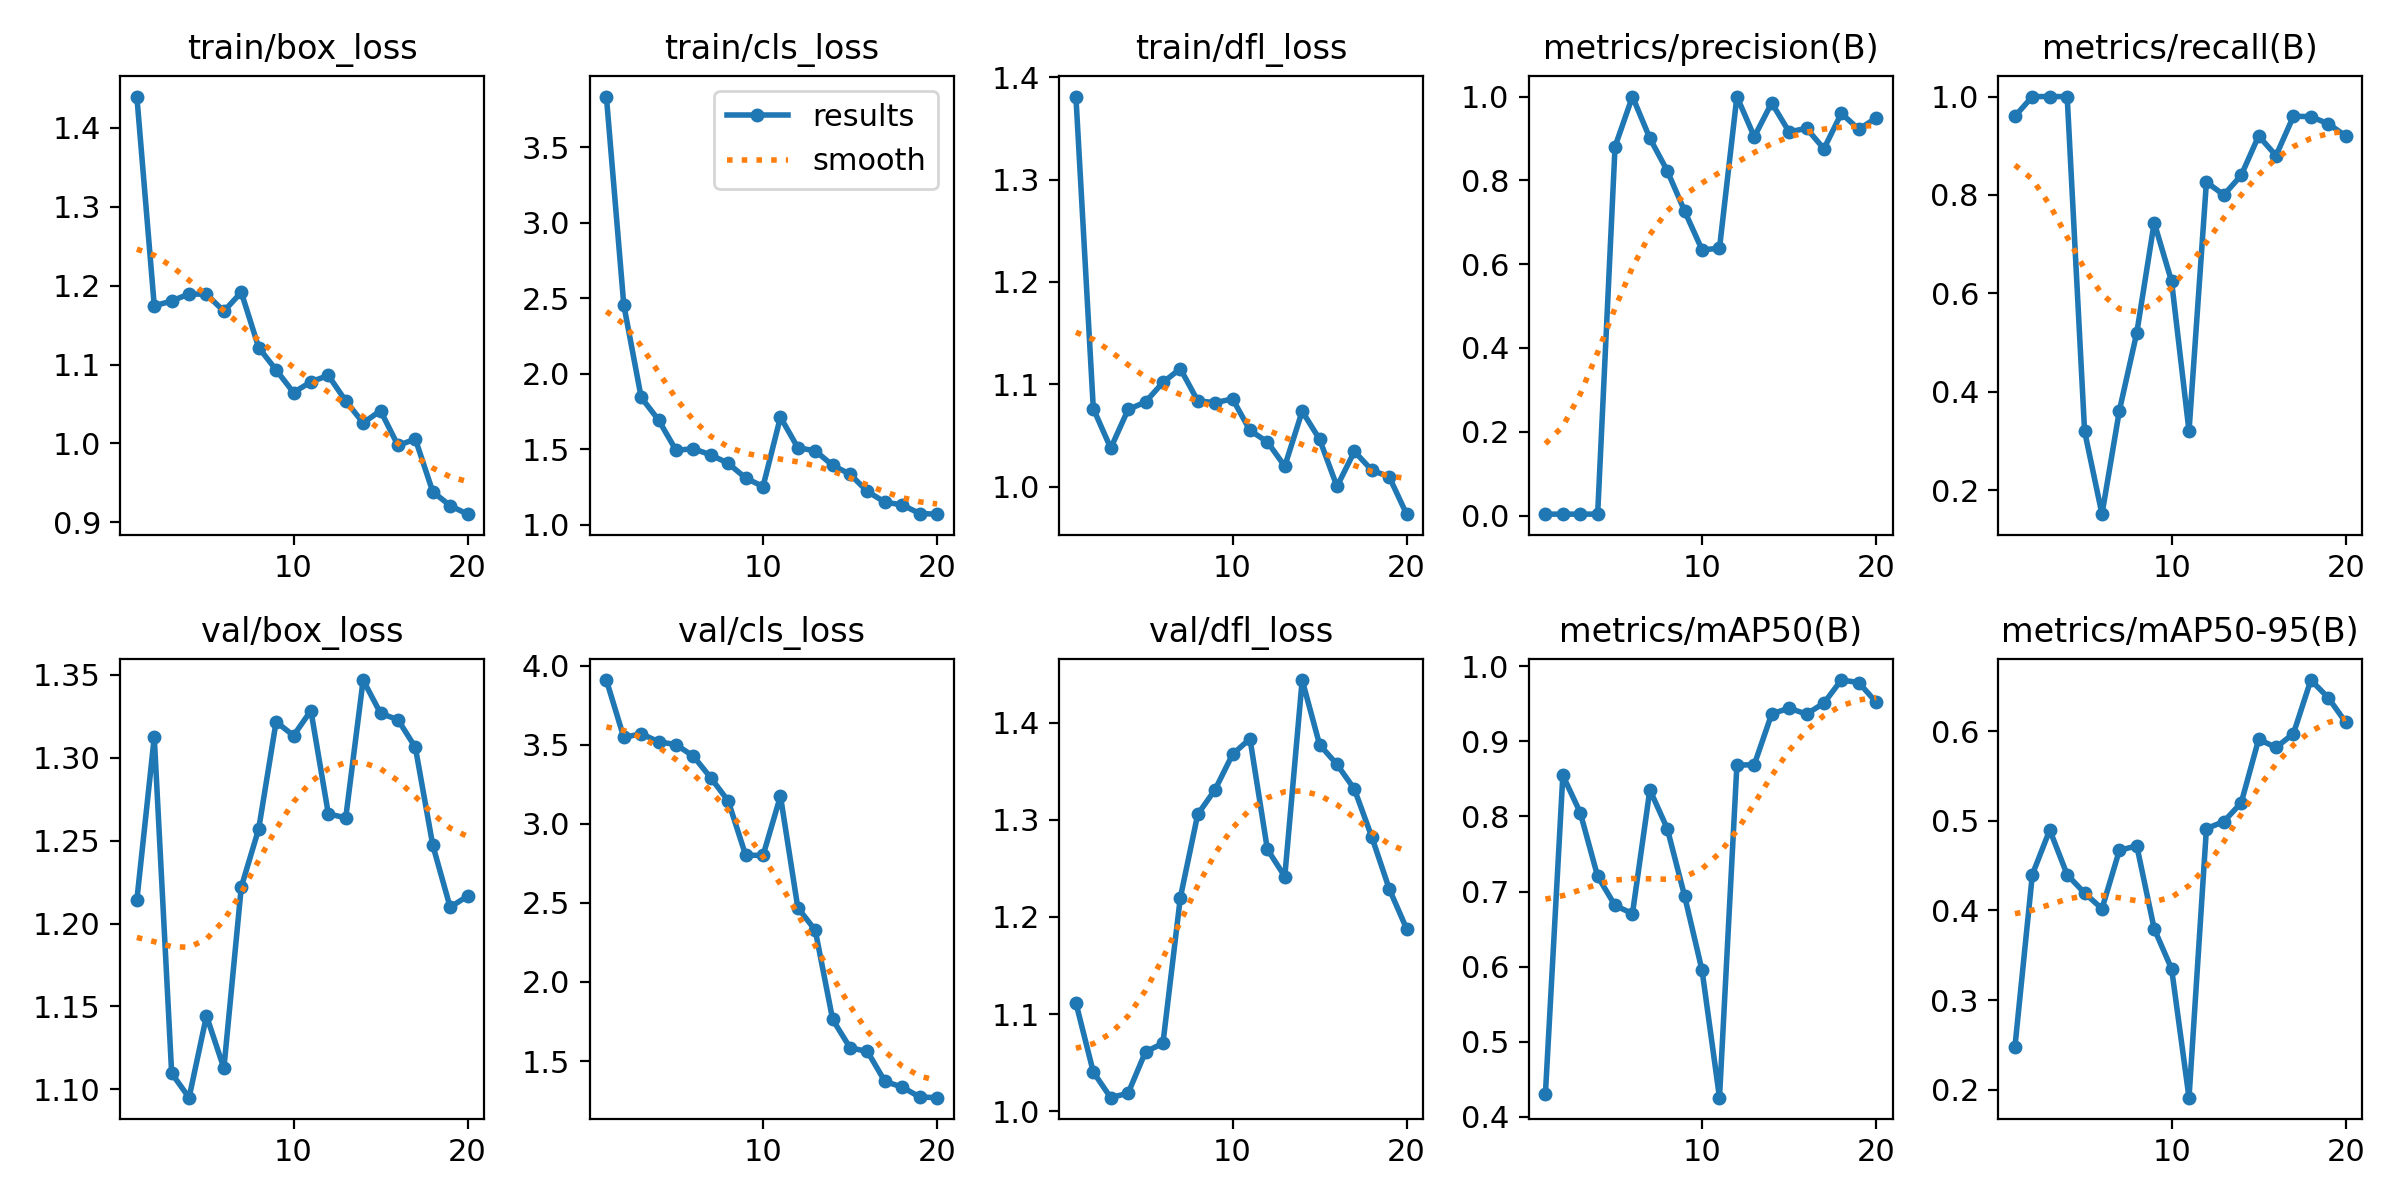

In [32]:
train_results = "/content/runs/detect/train3/results.png"

if os.path.exists(train_results):
    img = Image.open(train_results)  # Use PIL to read the image
    display(img)  # Display the image
else:
    print("Training results image not found.")


image 1/1 /content/TEST/TEST1.png: 416x640 1 license_plate, 152.5ms
Speed: 3.3ms preprocess, 152.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8312])
data: tensor([[447.7666, 327.6055, 707.8679, 393.6841,   0.8312,   0.0000]])
id: None
is_track: False
orig_shape: (742, 1200)
shape: torch.Size([1, 6])
xywh: tensor([[577.8172, 360.6448, 260.1013,  66.0786]])
xywhn: tensor([[0.4815, 0.4860, 0.2168, 0.0891]])
xyxy: tensor([[447.7666, 327.6055, 707.8679, 393.6841]])
xyxyn: tensor([[0.3731, 0.4415, 0.5899, 0.5306]])

image 1/1 /content/TEST/TEST2.png: 352x640 (no detections), 132.3ms
Speed: 3.4ms preprocess, 132.3ms inference, 0.7ms postprocess per image at shape (1, 3, 352, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (1057, 2045)
shape: torch.Size([0, 6])
xywh

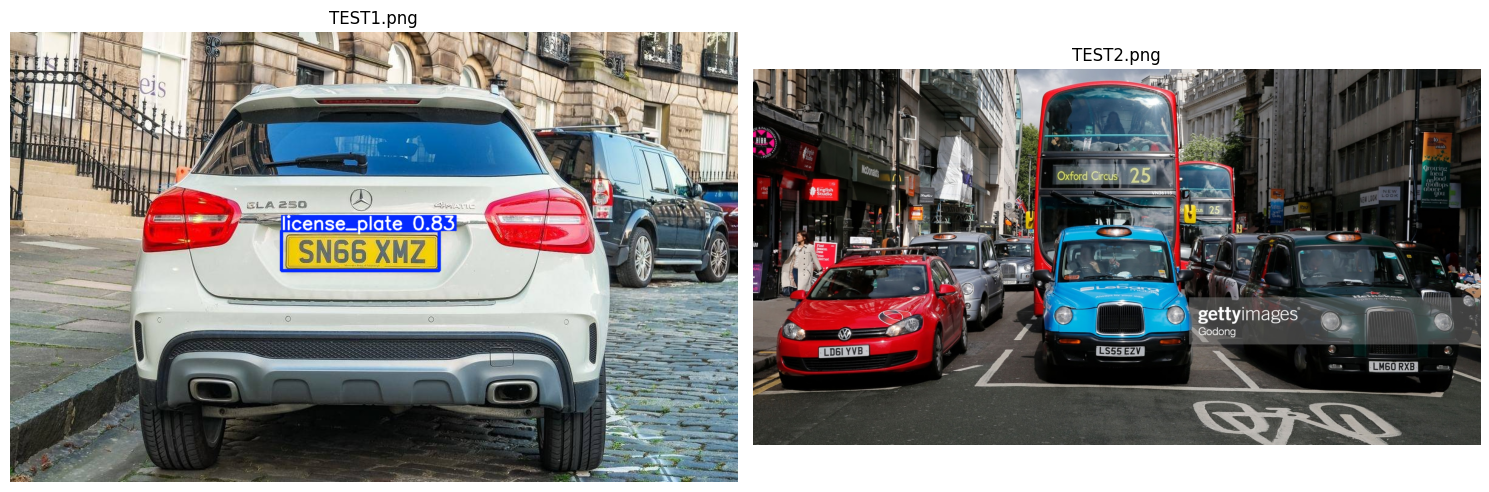

In [33]:
import glob
# Load trained YOLO model
model_path = "./runs/detect/train3/weights/best.pt"
model = YOLO(model_path)

# Collect all images from the directory
all_images = glob.glob("./TEST/*.png")

# Check for sufficient images
if len(all_images) < 2:
    raise ValueError("Not enough images in the ./TEST/ directory to sample 2.")

# Randomly select 2 different images
test_images = random.sample(all_images, 2)

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Loop over images and plot predictions
for img_path, ax in zip(test_images, axes.flatten()):
    results = model(img_path)      # Run YOLO on the image
    result_img = results[0].plot() # Get the annotated image
    print(results[0].boxes)
    # Convert the annotated image to RGB for display
    img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.axis("off")
    ax.set_title(os.path.basename(img_path))

plt.tight_layout()
plt.show()

In [34]:
# Load the trained YOLOv8 model
model_path = "./runs/detect/train3/weights/best.pt"
model = YOLO(model_path)

# Define input and output video paths
input_video = "./TEST/TEST.mov"
output_video = "./working/output_video.mp4"
compressed_video = "./working/output_video_compressed.mp4"  # Compressed version

# Open the input video file
cap = cv2.VideoCapture(input_video)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

# Process video frame by frame
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLOv8 on the frame
    results = model(frame, verbose=False)  # No extra logs

    # Draw bounding boxes
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0].item()
            label = f"Plate {conf:.2f}"

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Write frame to output video
    out.write(frame)
    frame_count += 1

# Release video resources
cap.release()
out.release()
cv2.destroyAllWindows()
print(f"✅ Detection completed! Processed {frame_count} frames.")

# ✅ **Compress the video using FFmpeg**
print("⏳ Compressing video... (This may take a few seconds)")
ffmpeg_command = [
    "ffmpeg", "-i", output_video, "-vcodec", "libx264", "-crf", "28", "-preset", "fast", compressed_video
]
subprocess.run(ffmpeg_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print("✅ Compression done!")

# Function to display video in Jupyter Notebook (Kaggle Compatible)
from IPython.display import HTML
from base64 import b64encode

def play_video(file_path, width=800):
    """Display a video file directly in a Jupyter Notebook (Kaggle compatible)."""
    try:
        with open(file_path, "rb") as video_file:
            video_data = video_file.read()
            video_base64 = b64encode(video_data).decode()
    except FileNotFoundError:
        return HTML("<p style='color:red;'>🚨 Error: Video file not found!</p>")

    video_html = f"""
    <video width="{width}" controls autoplay loop>
        <source src="data:video/mp4;base64,{video_base64}" type="video/mp4">
        Your browser does not support the video tag.
    </video>
    """

    return HTML(video_html)

# Display the compressed video
play_video(compressed_video, width=1000)

✅ Detection completed! Processed 212 frames.
⏳ Compressing video... (This may take a few seconds)
✅ Compression done!
